In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('MELD.Raw/train_sent_emo.csv')
df

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
...,...,...,...,...,...,...,...,...,...,...,...
9984,10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
9985,10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
9986,10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"
9987,10477,Yeah.,All,neutral,neutral,1038,16,2,3,"00:01:05,398","00:01:07,274"


In [4]:
df.count()

Sr No.          9989
Utterance       9989
Speaker         9989
Emotion         9989
Sentiment       9989
Dialogue_ID     9989
Utterance_ID    9989
Season          9989
Episode         9989
StartTime       9989
EndTime         9989
dtype: int64

In [6]:
df.describe()

,Sr No.,Dialogue_ID,Utterance_ID,Season,Episode
count,9989.000000,9989.000000,9989.00000,9989.000000,9989.000000
mean,5262.373511,526.549304,6.14516,4.853739,12.697467
std,3032.169169,302.464741,4.96027,2.389599,7.220051
min,1.000000,0.000000,0.00000,1.000000,1.000000
25%,2641.000000,261.000000,2.00000,3.000000,6.000000
50%,5267.000000,531.000000,5.00000,5.000000,12.000000
75%,7891.000000,795.000000,9.00000,7.000000,19.000000
max,10478.000000,1038.000000,23.00000,9.000000,25.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB


In [1]:
!pip install librosa

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 213 kB 15.9 MB/s            
     |████████████████████████████████| 3.4 MB 114.3 MB/s            
     |████████████████████████████████| 56 kB 4.6 MB/s             
     |████████████████████████████████| 377 kB 108.6 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 323 kB 89.9 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 25.3 MB 32.0 MB/s            
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23154 sha256=6b3d1bb40cb8c2b3f3545f5fe54f1bf6d174aa668ee18adff8c82465f21944d0
  Stored in directory: /home/ngmatta/.cache/pip/wheels/de/14/0a/863e4ed680b3204444cf486733e609d7ff7abe8fceafab67dc
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320731 sha256=aeb544b2708859636cacda3c1bab148a7a2954f888fecdbd1cfbbe54299c94d6


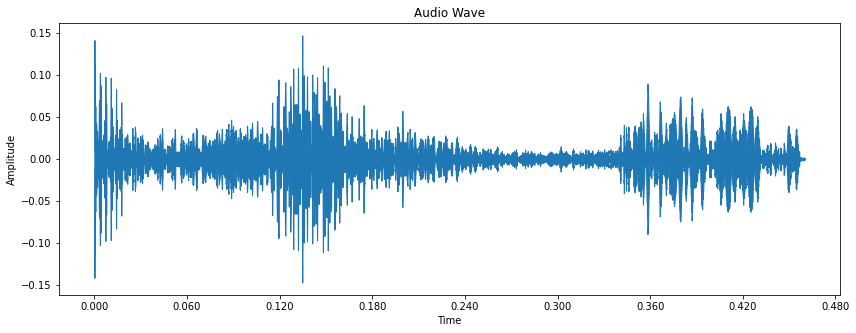

In [44]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
root = 'MELD.Raw/audio_train_splits/'
file = 'dia415_utt0.wav'
audio_array, sampling_rate = librosa.load(os.path.join(root, file), duration=3.5, offset=0.6)
plt.figure(figsize=(14, 5) )
plt.title( 'Audio Wave')
plt.xlabel('time')
plt.ylabel('Amplitude')
librosa.display.waveshow(audio_array, sr=sampling_rate)
plt.show()

In [11]:
os.path.join(root, file)

'./MELD.Raw/audio_train_splits/dia415_utt0.mp3'

In [12]:
!ls

MELD.Raw  MELD.Raw.tar.gz  Untitled1.ipynb  Untitled.ipynb


In [18]:
from moviepy.editor import VideoFileClip
def convert_video_to_audio_moviepy(video_file, output_directory, output_ext="wav"):
    """Converts video to audio using MoviePy library
    that uses `ffmpeg` under the hood"""
    filename, ext = os.path.splitext(video_file)
    clip = VideoFileClip(video_file)
    filename = filename.split('/')[2]
    clip.audio.write_audiofile(f"{output_directory}{filename}.{output_ext}")

In [23]:
convert_video_to_audio_moviepy('MELD.Raw/train_splits/dia415_utt0.mp4', 'MELD.Raw/audio_train_splits/')

MoviePy - Writing audio in MELD.Raw/audio_train_splits/dia415_utt0.wav


MoviePy - Done.


In [39]:
import numpy as np
def extract_features(x, sample_rate):
    result=np.array([])
    #MFCC
    mfccs = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfccs))
    #Chroma
    stft = np.abs(librosa.stft(x))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma))
    #Mel Spectrogram
    mel = np.mean (librosa.feature.melspectrogram(x, sr=sample_rate).T,axis=0)
    result = np.hstack((result, mel))
    return result

In [40]:
extract_features(audio_array, sampling_rate)

array([-3.17018341e+02,  1.40831390e+02, -5.10405636e+00,  2.83516293e+01,
       -6.86708450e+00,  1.24096546e+01, -9.88710022e+00, -7.84974957e+00,
       -6.63044214e+00,  7.05018234e+00, -4.28008080e+00,  1.75938535e+00,
       -9.61697197e+00,  5.88234603e-01, -4.50961113e+00,  3.52613449e+00,
       -1.31015587e+00,  2.31617188e+00, -7.11768341e+00, -4.03496563e-01,
        7.04457760e-01,  6.94444954e-01,  6.75487399e-01,  6.08029068e-01,
        6.49089515e-01,  7.00766206e-01,  7.41631567e-01,  6.89210296e-01,
        6.66181803e-01,  7.75207639e-01,  7.69274712e-01,  7.20578730e-01,
        2.35938914e-02,  7.76813805e-01,  1.97860968e+00,  7.74067819e-01,
        1.61485612e+00,  5.81745744e-01,  4.84325022e-01,  5.23915827e-01,
        3.60655725e-01,  2.11262986e-01,  2.07171589e-01,  7.28783250e-01,
        8.52340102e-01,  2.66636968e-01,  3.90486747e-01,  5.19140840e-01,
        7.95889914e-01,  1.21113408e+00,  5.94976604e-01,  6.35577679e-01,
        3.61246049e-01,  

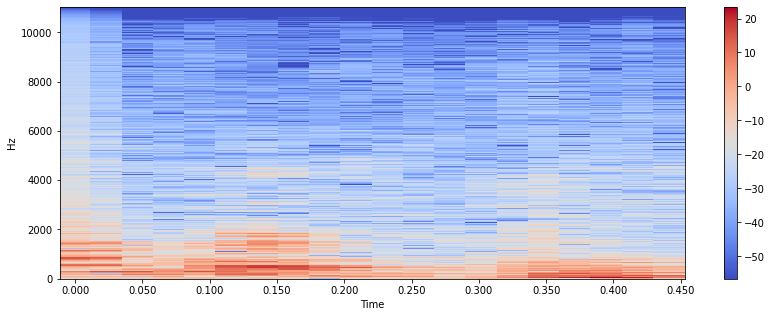

In [42]:
#display Spectrogram
X = librosa.stft(audio_array)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sampling_rate, x_axis='time', y_axis='hz') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()